TECHNIQUES PRACTICAL ASSIGNMENT


In [ ]:
#Q1:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(base_estimator=base_estimator,
                                 n_estimators=50,
                                 random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

In [ ]:
#Q2:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeRegressor(random_state=42)

bagging_regressor = BaggingRegressor(base_estimator=base_estimator,n_estimators=50,random_state=42)

bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error: {mse:.4f}")

In [1]:
#Q3:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)


Feature Importance Scores:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fra

In [2]:
#Q4:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

data = load_breast_cancer()

X = data.data[:, 1:]
y = data.data[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Mean Squared Error (Decision Tree):", dt_mse)
print("Mean Squared Error (Random Forest):", rf_mse)


Mean Squared Error (Decision Tree): 0.03540415789473685
Mean Squared Error (Random Forest): 0.0361835433912285


In [3]:
#Q5:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

print("Out-of-Bag (OOB) Score:", rf.oob_score_)


Out-of-Bag (OOB) Score: 0.9560439560439561


In [ ]:
#Q6:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(probability=True, kernel='rbf', C=1.0, random_state=42)

bagging_clf = BaggingClassifier(
    base_estimator=svm,
    n_estimators=10,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier (with SVM) Accuracy:", accuracy)


In [5]:
#Q7:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [1, 10, 50, 100, 200]
accuracy_results = {}

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[n] = accuracy
    print(f"n_estimators = {n}, Accuracy = {accuracy:.4f}")


n_estimators = 1, Accuracy = 0.9386
n_estimators = 10, Accuracy = 0.9561
n_estimators = 50, Accuracy = 0.9649
n_estimators = 100, Accuracy = 0.9649
n_estimators = 200, Accuracy = 0.9649


In [ ]:
#Q8:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = LogisticRegression(solver='liblinear', random_state=42)

bagging_clf = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_proba = bagging_clf.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_proba)
print("Bagging Classifier (Logistic Regression) AUC Score:", round(auc_score, 4))


Feature Importances:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


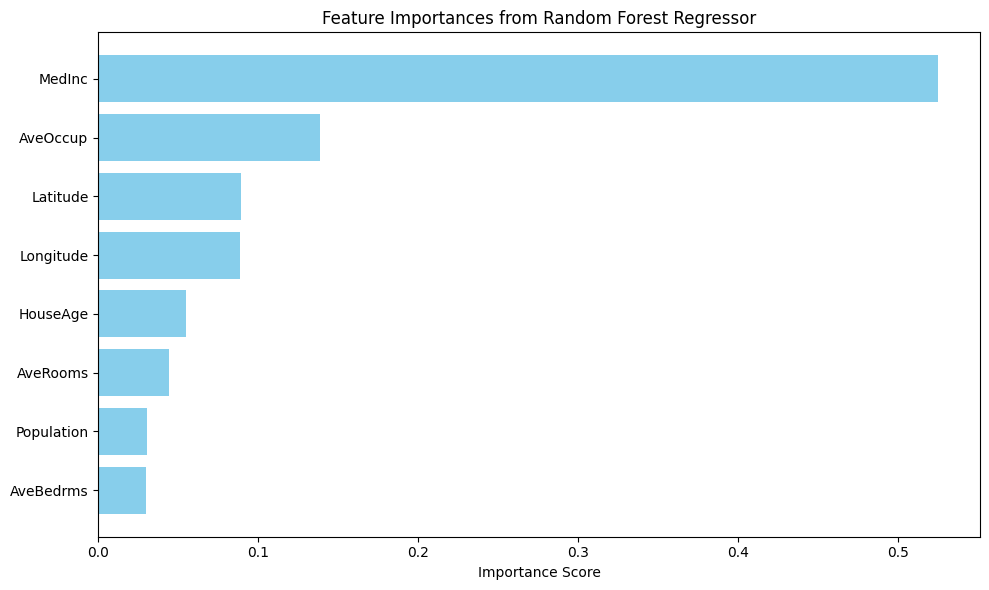

In [7]:
#Q9:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importances from Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#Q10:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)
bagging.fit(X_train, y_train)
bagging_preds = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print(f"Bagging Classifier Accuracy:      {bagging_acc:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_acc:.4f}")


In [ ]:
  #Q11:
  from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", round(accuracy, 4))


In [ ]:
#Q12:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator_range = [1, 5, 10, 25, 50, 100, 150]
mse_scores = []

for n in estimator_range:
    bagging = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"n_estimators: {n}, MSE: {mse:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(estimator_range, mse_scores, marker='o', linestyle='-', color='teal')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance vs Number of Estimators')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#Q13:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

misclassified_indices = np.where(y_test != y_pred)[0]
print(f"\nNumber of Misclassified Samples: {len(misclassified_indices)}\n")

print("Index\tTrue Label\tPredicted Label")
for idx in misclassified_indices:
    print(f"{idx}\t{y_test[idx]}\t\t{y_pred[idx]}")


Test Accuracy: 0.9649

Number of Misclassified Samples: 4

Index	True Label	Predicted Label
8	1		0
20	0		1
77	0		1
82	0		1


In [ ]:
#Q14:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
print(f"Decision Tree Accuracy: {tree_acc:.4f}")

bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")


Accuracy: 0.9649


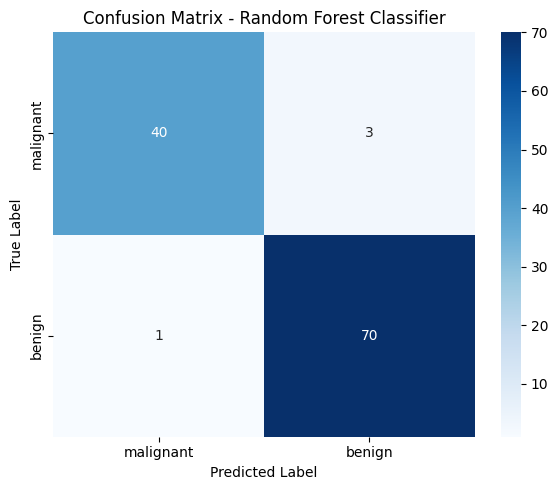

In [13]:
#Q15
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = data.target_names

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()


In [14]:
#Q16:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
]

final_estimator = LogisticRegression(max_iter=1000, random_state=42)

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(random_state=42)),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Stacking Classifier": stacking
}

print("Model Performance:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:20}: Accuracy = {acc:.4f}")


Model Performance:

Decision Tree       : Accuracy = 0.9474
SVM                 : Accuracy = 0.9825
Logistic Regression : Accuracy = 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier : Accuracy = 0.9737


In [15]:
#Q17:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

top5 = importance_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Important Features:")
print(top5.to_string(index=False))


Top 5 Important Features:
             Feature  Importance
          worst area    0.153892
worst concave points    0.144663
 mean concave points    0.106210
        worst radius    0.077987
      mean concavity    0.068001


In [ ]:
#Q!8:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


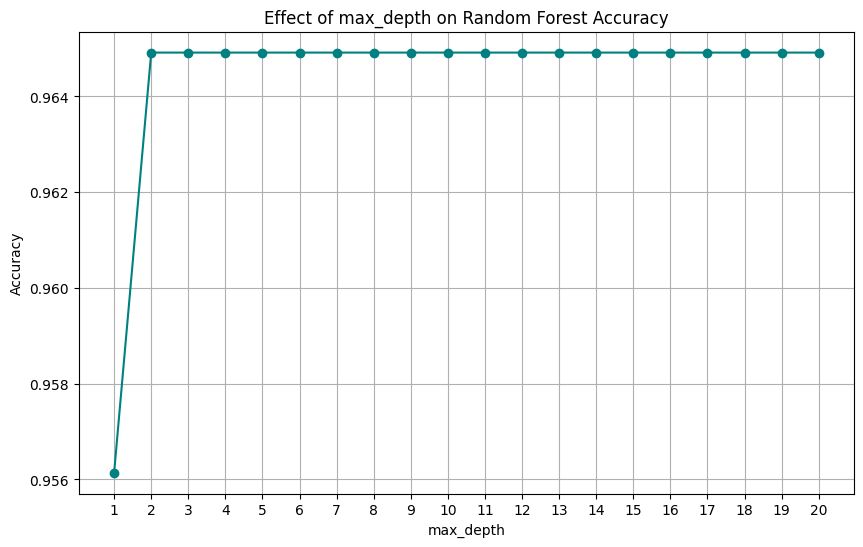

In [17]:
#Q19:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = list(range(1, 21))
accuracies = []

for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='teal')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(depths)
plt.show()


In [ ]:
#Q20:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

bag_dt = BaggingRegressor(base_estimator=dt, n_estimators=100, random_state=42, n_jobs=-1)
bag_dt.fit(X_train, y_train)
pred_dt = bag_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, pred_dt)
r2_dt = r2_score(y_test, pred_dt)

bag_knn = BaggingRegressor(base_estimator=knn, n_estimators=100, random_state=42, n_jobs=-1)
bag_knn.fit(X_train, y_train)
pred_knn = bag_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, pred_knn)
r2_knn = r2_score(y_test, pred_knn)

print("Performance Comparison of Bagging Regressors:")
print("---------------------------------------------")
print(f"Decision Tree - MSE: {mse_dt:.3f}, R²: {r2_dt:.3f}")
print(f"K-Neighbors   - MSE: {mse_knn:.3f}, R²: {r2_knn:.3f}")


ROC-AUC Score: 0.9953


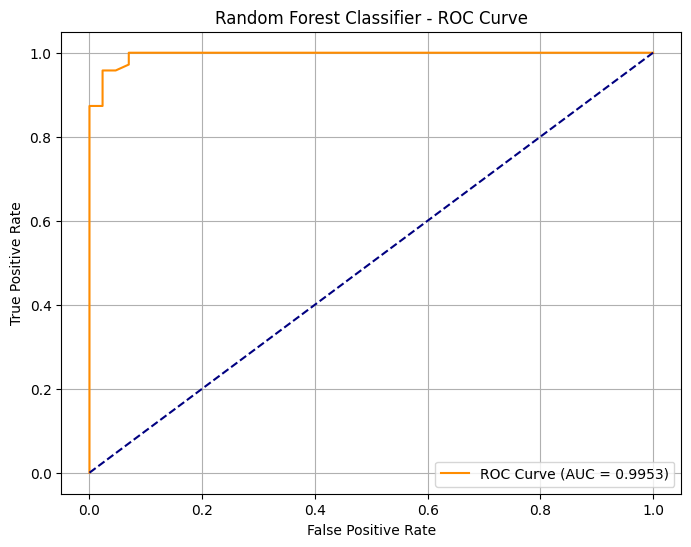

In [19]:
#Q21:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier - ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#Q22:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


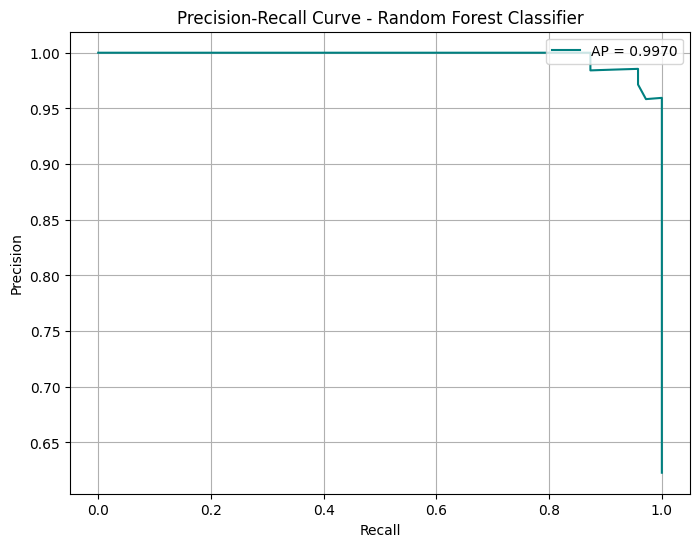

In [21]:
#Q23:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.4f}', color='teal')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [22]:
#Q24:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

rf = estimators[0][1]
lr = estimators[1][1]

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
lr_preds = lr.predict(X_test)
stacking_preds = stacking_clf.predict(X_test)

print(f"Random Forest Accuracy:       {accuracy_score(y_test, rf_preds):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_preds):.4f}")
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, stacking_preds):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy:       0.9649
Logistic Regression Accuracy: 0.9561
Stacking Classifier Accuracy: 0.9649


In [ ]:
#Q25:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_samples_values = [0.3, 0.5, 0.7, 0.9, 1.0]
mse_scores = []

for max_samples in max_samples_values:
    model = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_scores.append(mse)
    print(f"max_samples = {max_samples:.1f}, MSE = {mse:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(max_samples_values, mse_scores, marker='o', linestyle='-', color='teal')
plt.title('Bagging Regressor Performance vs Bootstrap Sample Size')
plt.xlabel('max_samples')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
